In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [75]:
df = pd.read_csv(r'dataset/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [76]:
df.drop(
    filter(lambda x: x.endswith('_lognorm'), df.columns),
    axis=1,
    inplace=True
)

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 14 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null object
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 13.4+ MB


In [79]:
df.describe(include=["object", "bool"]).T # бинарные и категориальные

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/274282/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [80]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [81]:
df['published'] = pd.to_datetime(df['published'], yearfirst=True)
print(df.published.dtype)

datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [82]:
df['year'] = [d.year for d in df['published']]
df['month'] = [d.month for d in df['published']]
df['day'] = [d.day for d in df['published']]
df['dayofweek'] = [d.isoweekday() for d in df['published']]
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,day,dayofweek
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,1,2
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,1,2
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,1,2
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,2,3
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,2,3


## 1. В каком месяце (и какого года) было больше всего публикаций?

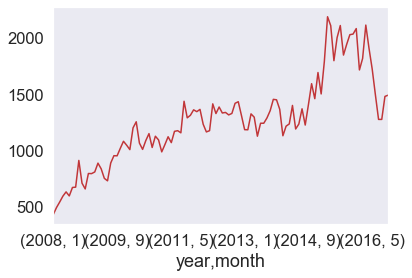

In [83]:
df.groupby(['year', 'month']).count()['post_id'].plot()

In [84]:
df.groupby(['year', 'month']).count()['post_id'].idxmax()

(2015, 3)

## 2. Выберите один или несколько вариантов:

Один или несколько дней сильно выделяются из общей картины

На хабре всегда больше статей, чем на гиктаймсе

По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

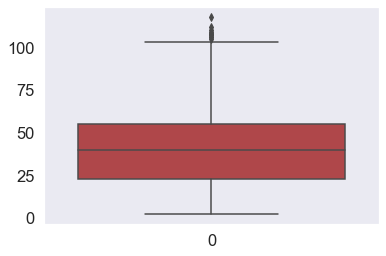

In [85]:
sns.boxplot(data=df.groupby(['year', 'month', 'day']).count()['post_id'])

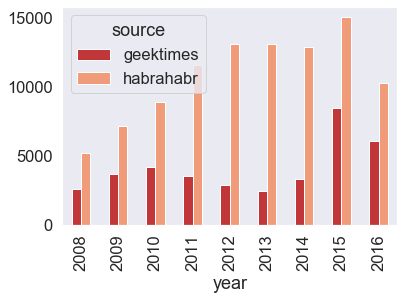

In [86]:
df['source'] = ['habrahabr' if 'habrahabr' in d else 'geektimes' for d in df['url'] ]
df_temp = df[['year', 'source']]
df_temp.groupby('year')['source'].value_counts().unstack(fill_value=0).plot(kind='bar')

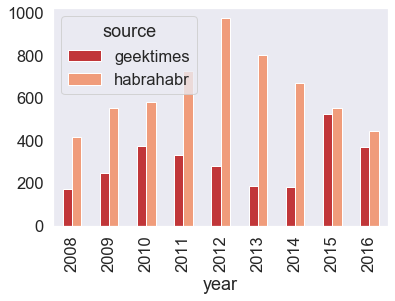

In [87]:
df_temp = df[['year', 'dayofweek', 'source']]
df_temp = df_temp[df_temp['dayofweek'] == 6]
df_temp.groupby('year')['source'].value_counts().unstack(fill_value=0).plot(kind='bar')

## 3. Когда лучше всего публиковать статью?
Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

У опубликованных в 10 утра постов больше всего комментариев

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера

На хабре дневные статьи комментируют чаще, чем вечерние

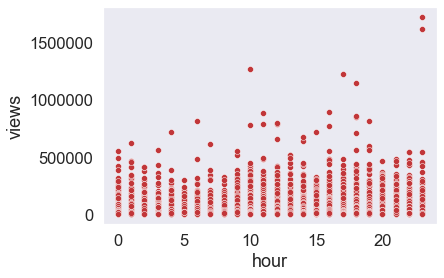

In [90]:
df['hour'] = [d.hour for d in df['published']]
sns.scatterplot(data = df, x='hour', y='views')

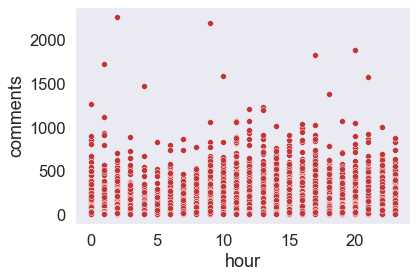

In [91]:
sns.scatterplot(data = df, x='hour', y='comments')